# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [6]:
print(f'rows {df_data.shape[0]} and columns {df_data.shape[1]}')

rows 962 and columns 16


In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df_data.sort_values('year',ascending=True).head(10)

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   
5  1901     Physics                 The Nobel Prize in Physics 1901   
6  1902   Chemistry               The Nobel Prize in Chemistry 1902   
7  1902  Literature              The Nobel Prize in Literature 1902   
8  1902    Medicine  The Nobel Prize in Physiology or Medicine 1902   
9  1902       Peace                      The Nobel Peace Prize 1902   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   
5  "in recognition of the extraordinary services ...         1/1   
6  "in recognition of the extraordinary services ...         1/1   
7  "the greatest living master of the art of hist...         1/1   
8  "for his work on malaria, by which he has show...         1/1   
9                                                NaN         1/2   

  laureate_type                           full_name  birth_date  \
0    Individual        Jacobus Henricus van 't Hoff  1852-08-30   
1    Individual                     Sully Prudhomme  1839-03-16   
2    Individual              Emil Adolf von Behring  1854-03-15   
3    Individual                      Frédéric Passy  1822-05-20   
4    Individual                   Jean Henry Dunant  1828-05-08   
5    Individual              Wilhelm Conrad Röntgen  1845-03-27   
6    Individual                Hermann Emil Fischer  1852-10-09   
7    Individual  Christian Matthias Theodor Mommsen  1817-11-30   
8    Individual                         Ronald Ross  1857-05-13   
9    Individual                Charles Albert Gobat  1843-05-21   

           birth_city        birth_country birth_country_current   sex  \
0           Rotterdam          Netherlands           Netherlands  Male   
1               Paris               France                France  Male   
2   Hansdorf (Lawice)     Prussia (Poland)                Poland  Male   
3               Paris               France                France  Male   
4              Geneva          Switzerland           Switzerland  Male   
5  Lennep (Remscheid)    Prussia (Germany)               Germany  Male   
6          Euskirchen    Prussia (Germany)               Germany  Male   
7             Garding  Schleswig (Germany)               Germany  Male   
8              Almora                India                 India  Male   
9            Tramelan          Switzerland           Switzerland  Male   

           organization_name organization_city organization_country  ISO  
0          Berlin University            Berlin              Germany  NLD  
1                        NaN               NaN                  NaN  FRA  
2         Marburg University           Marburg              Germany  POL  
3                        NaN               NaN                  NaN  FRA  
4                        NaN               NaN                  NaN  CHE  
5          Munich University            Munich              Germany  DEU  
6          Berlin University            Berlin              Germany  DEU  
7                        NaN               NaN                  NaN  DEU  
8  University College London         Liverpool       United Kingdom  IND  
9                        NaN               NaN                  NaN  CHE

In [9]:
df_data.sort_values('year',ascending=False).head()

year   category                                              prize  \
961  2020    Physics                    The Nobel Prize in Physics 2020   
955  2020   Medicine     The Nobel Prize in Physiology or Medicine 2020   
950  2020  Chemistry                  The Nobel Prize in Chemistry 2020   
951  2020  Chemistry                  The Nobel Prize in Chemistry 2020   
952  2020  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
961  “for the discovery that black hole formation i...         1/2   
955           “for the discovery of Hepatitis C virus”         1/3   
950  “for the development of a method for genome ed...         1/2   
951  “for the development of a method for genome ed...         1/2   
952  “for improvements to auction theory and invent...         1/2   

    laureate_type               full_name  birth_date       birth_city  \
961    Individual           Roger Penrose  1931-08-08       Colchester   
955    Individual         Charles M. Rice  1952-08-25   Sacramento, CA   
950    Individual  Emmanuelle Charpentier  1968-12-11  Juvisy-sur-Orge   
951    Individual      Jennifer A. Doudna  1964-02-19   Washington, DC   
952    Individual         Paul R. Milgrom  1948-04-20      Detroit, MI   

                birth_country     birth_country_current     sex  \
961            United Kingdom            United Kingdom    Male   
955  United States of America  United States of America    Male   
950                    France                    France  Female   
951  United States of America  United States of America  Female   
952  United States of America  United States of America    Male   

            organization_name organization_city      organization_country  ISO  
961      University of Oxford            Oxford            United Kingdom  GBR  
955    Rockefeller University      New York, NY  United States of America  USA  
950       Max-Planck-Institut            Berlin                   Germany  FRA  
951  University of California      Berkeley, CA  United States of America  USA  
952       Stanford University      Stanford, CA  United States of America  USA

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [11]:
df_data.isna().values.any()

True

In [12]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [14]:
df_data.birth_date=pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [15]:
separated_values=df_data.prize_share.str.split('/',expand=True)
numerator=pd.to_numeric(separated_values[0])
denomenator=pd.to_numeric(separated_values[1])
df_data['share_pct']=numerator/denomenator

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [17]:
gender=df_data.sex.value_counts()
fig=px.pie(labels=gender.index,values=gender.values,title="Percentage of Male Vs female",
          names=gender.index,hole=0.5)
fig.show()

In [18]:
df_data[df_data.sex=='Female'].sort_values('year')

year    category                                              prize  \
18   1903     Physics                    The Nobel Prize in Physics 1903   
29   1905       Peace                         The Nobel Peace Prize 1905   
51   1909  Literature                 The Nobel Prize in Literature 1909   
62   1911   Chemistry                  The Nobel Prize in Chemistry 1911   
128  1926  Literature                 The Nobel Prize in Literature 1926   
141  1928  Literature                 The Nobel Prize in Literature 1928   
160  1931       Peace                         The Nobel Peace Prize 1931   
179  1935   Chemistry                  The Nobel Prize in Chemistry 1935   
198  1938  Literature                 The Nobel Prize in Literature 1938   
218  1945  Literature                 The Nobel Prize in Literature 1945   
229  1946       Peace                         The Nobel Peace Prize 1946   
236  1947    Medicine     The Nobel Prize in Physiology or Medicine 1947   
352  1963     Physics                    The Nobel Prize in Physics 1963   
353  1964   Chemistry                  The Nobel Prize in Chemistry 1964   
371  1966  Literature                 The Nobel Prize in Literature 1966   
468  1976       Peace                         The Nobel Peace Prize 1976   
469  1976       Peace                         The Nobel Peace Prize 1976   
478  1977    Medicine     The Nobel Prize in Physiology or Medicine 1977   
501  1979       Peace                         The Nobel Peace Prize 1979   
534  1982       Peace                         The Nobel Peace Prize 1982   
539  1983    Medicine     The Nobel Prize in Physiology or Medicine 1983   
565  1986    Medicine     The Nobel Prize in Physiology or Medicine 1986   
586  1988    Medicine     The Nobel Prize in Physiology or Medicine 1988   
615  1991  Literature                 The Nobel Prize in Literature 1991   
618  1991       Peace                         The Nobel Peace Prize 1991   
625  1992       Peace                         The Nobel Peace Prize 1992   
631  1993  Literature                 The Nobel Prize in Literature 1993   
655  1995    Medicine     The Nobel Prize in Physiology or Medicine 1995   
667  1996  Literature                 The Nobel Prize in Literature 1996   
683  1997       Peace                         The Nobel Peace Prize 1997   
754  2003       Peace                         The Nobel Peace Prize 2003   
763  2004  Literature                 The Nobel Prize in Literature 2004   
764  2004    Medicine     The Nobel Prize in Physiology or Medicine 2004   
766  2004       Peace                         The Nobel Peace Prize 2004   
796  2007  Literature                 The Nobel Prize in Literature 2007   
809  2008    Medicine     The Nobel Prize in Physiology or Medicine 2008   
816  2009   Chemistry                  The Nobel Prize in Chemistry 2009   
819  2009   Economics  The Sveriges Riksbank Prize in Economic Scienc...   
821  2009  Literature                 The Nobel Prize in Literature 2009   
822  2009    Medicine     The Nobel Prize in Physiology or Medicine 2009   
823  2009    Medicine     The Nobel Prize in Physiology or Medicine 2009   
848  2011       Peace                         The Nobel Peace Prize 2011   
849  2011       Peace                         The Nobel Peace Prize 2011   
847  2011       Peace                         The Nobel Peace Prize 2011   
869  2013  Literature                 The Nobel Prize in Literature 2013   
883  2014    Medicine     The Nobel Prize in Physiology or Medicine 2014   
885  2014       Peace                         The Nobel Peace Prize 2014   
893  2015  Literature                 The Nobel Prize in Literature 2015   
896  2015    Medicine     The Nobel Prize in Physiology or Medicine 2015   
923  2018   Chemistry                  The Nobel Prize in Chemistry 2018   
928  2018  Literature                 The Nobel Prize in Literature 2018   
932  2018       Peace                         The Nob

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [19]:
df_data[df_data.sex=='Female'].sort_values('year',ascending=True).head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

In [20]:
df_data[df_data.sex=='Female'].sort_values('year',ascending=True)['prize'].head()

18        The Nobel Prize in Physics 1903
29             The Nobel Peace Prize 1905
51     The Nobel Prize in Literature 1909
62      The Nobel Prize in Chemistry 1911
128    The Nobel Prize in Literature 1926
Name: prize, dtype: object

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [21]:
is_winnner=df_data.duplicated(subset=['full_name'],keep=False)
multiple_winners=df_data[is_winnner]
multiple_winners.full_name.nunique()

6

In [22]:
col_subset=['year','category','laureate_type','full_name']
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [23]:
df_data.category.nunique()

6

In [24]:
prize_per_category=df_data.category.value_counts()
prize_per_category

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [25]:
v_bar=px.bar(x=prize_per_category.index,y=prize_per_category.values,color=prize_per_category.values,
            color_continuous_scale='Aggrnyl',title='Number of Prizes Awarded per Category')
v_bar.update_layout(xaxis_title='Nobel Prize Category',coloraxis_showscale=False,
                   yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [26]:
df_data[df_data.category=='Economics'].sort_values('year',ascending=True).head()

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
411  1971  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
419  1972  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   
411  "for his empirically founded interpretation of...         1/1   
419  "for their pioneering contributions to general...         1/2   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   
411    Individual      Simon Kuznets 1901-04-30      Pinsk   
419    Individual      John R. Hicks 1904-04-08    Warwick   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   
411  Russian Empire (Belarus)                   Belarus  Male   
419            United Kingdom            United Kingdom  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   
411                           Harvard University     Cambridge, MA   
419                         University of Oxford            Oxford   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00  
411  United States of America  BLR       1.00  
419            United Kingdom  GBR       0.50

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [27]:
cat_men_women=df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
cat_men_women.sort_values('prize',ascending=False,inplace=True)

In [28]:
cat_men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [29]:
v_bar_split=px.bar(x=cat_men_women.category,y=cat_men_women.prize,color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [30]:
prize_per_year=df_data.groupby('year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [31]:
moving_average=prize_per_year.rolling(window=5).mean()

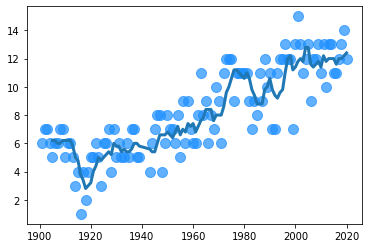

In [32]:
plt.scatter(x=prize_per_year.index,y=prize_per_year.values,c='dodgerblue',alpha=0.7,s=100)
plt.plot(prize_per_year.index,moving_average.values,linewidth=3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [33]:
yearly_avg_share=df_data.groupby('year').agg({'share_pct':pd.Series.mean})

In [34]:
share_moving_avg=yearly_avg_share.rolling(window=5).mean()

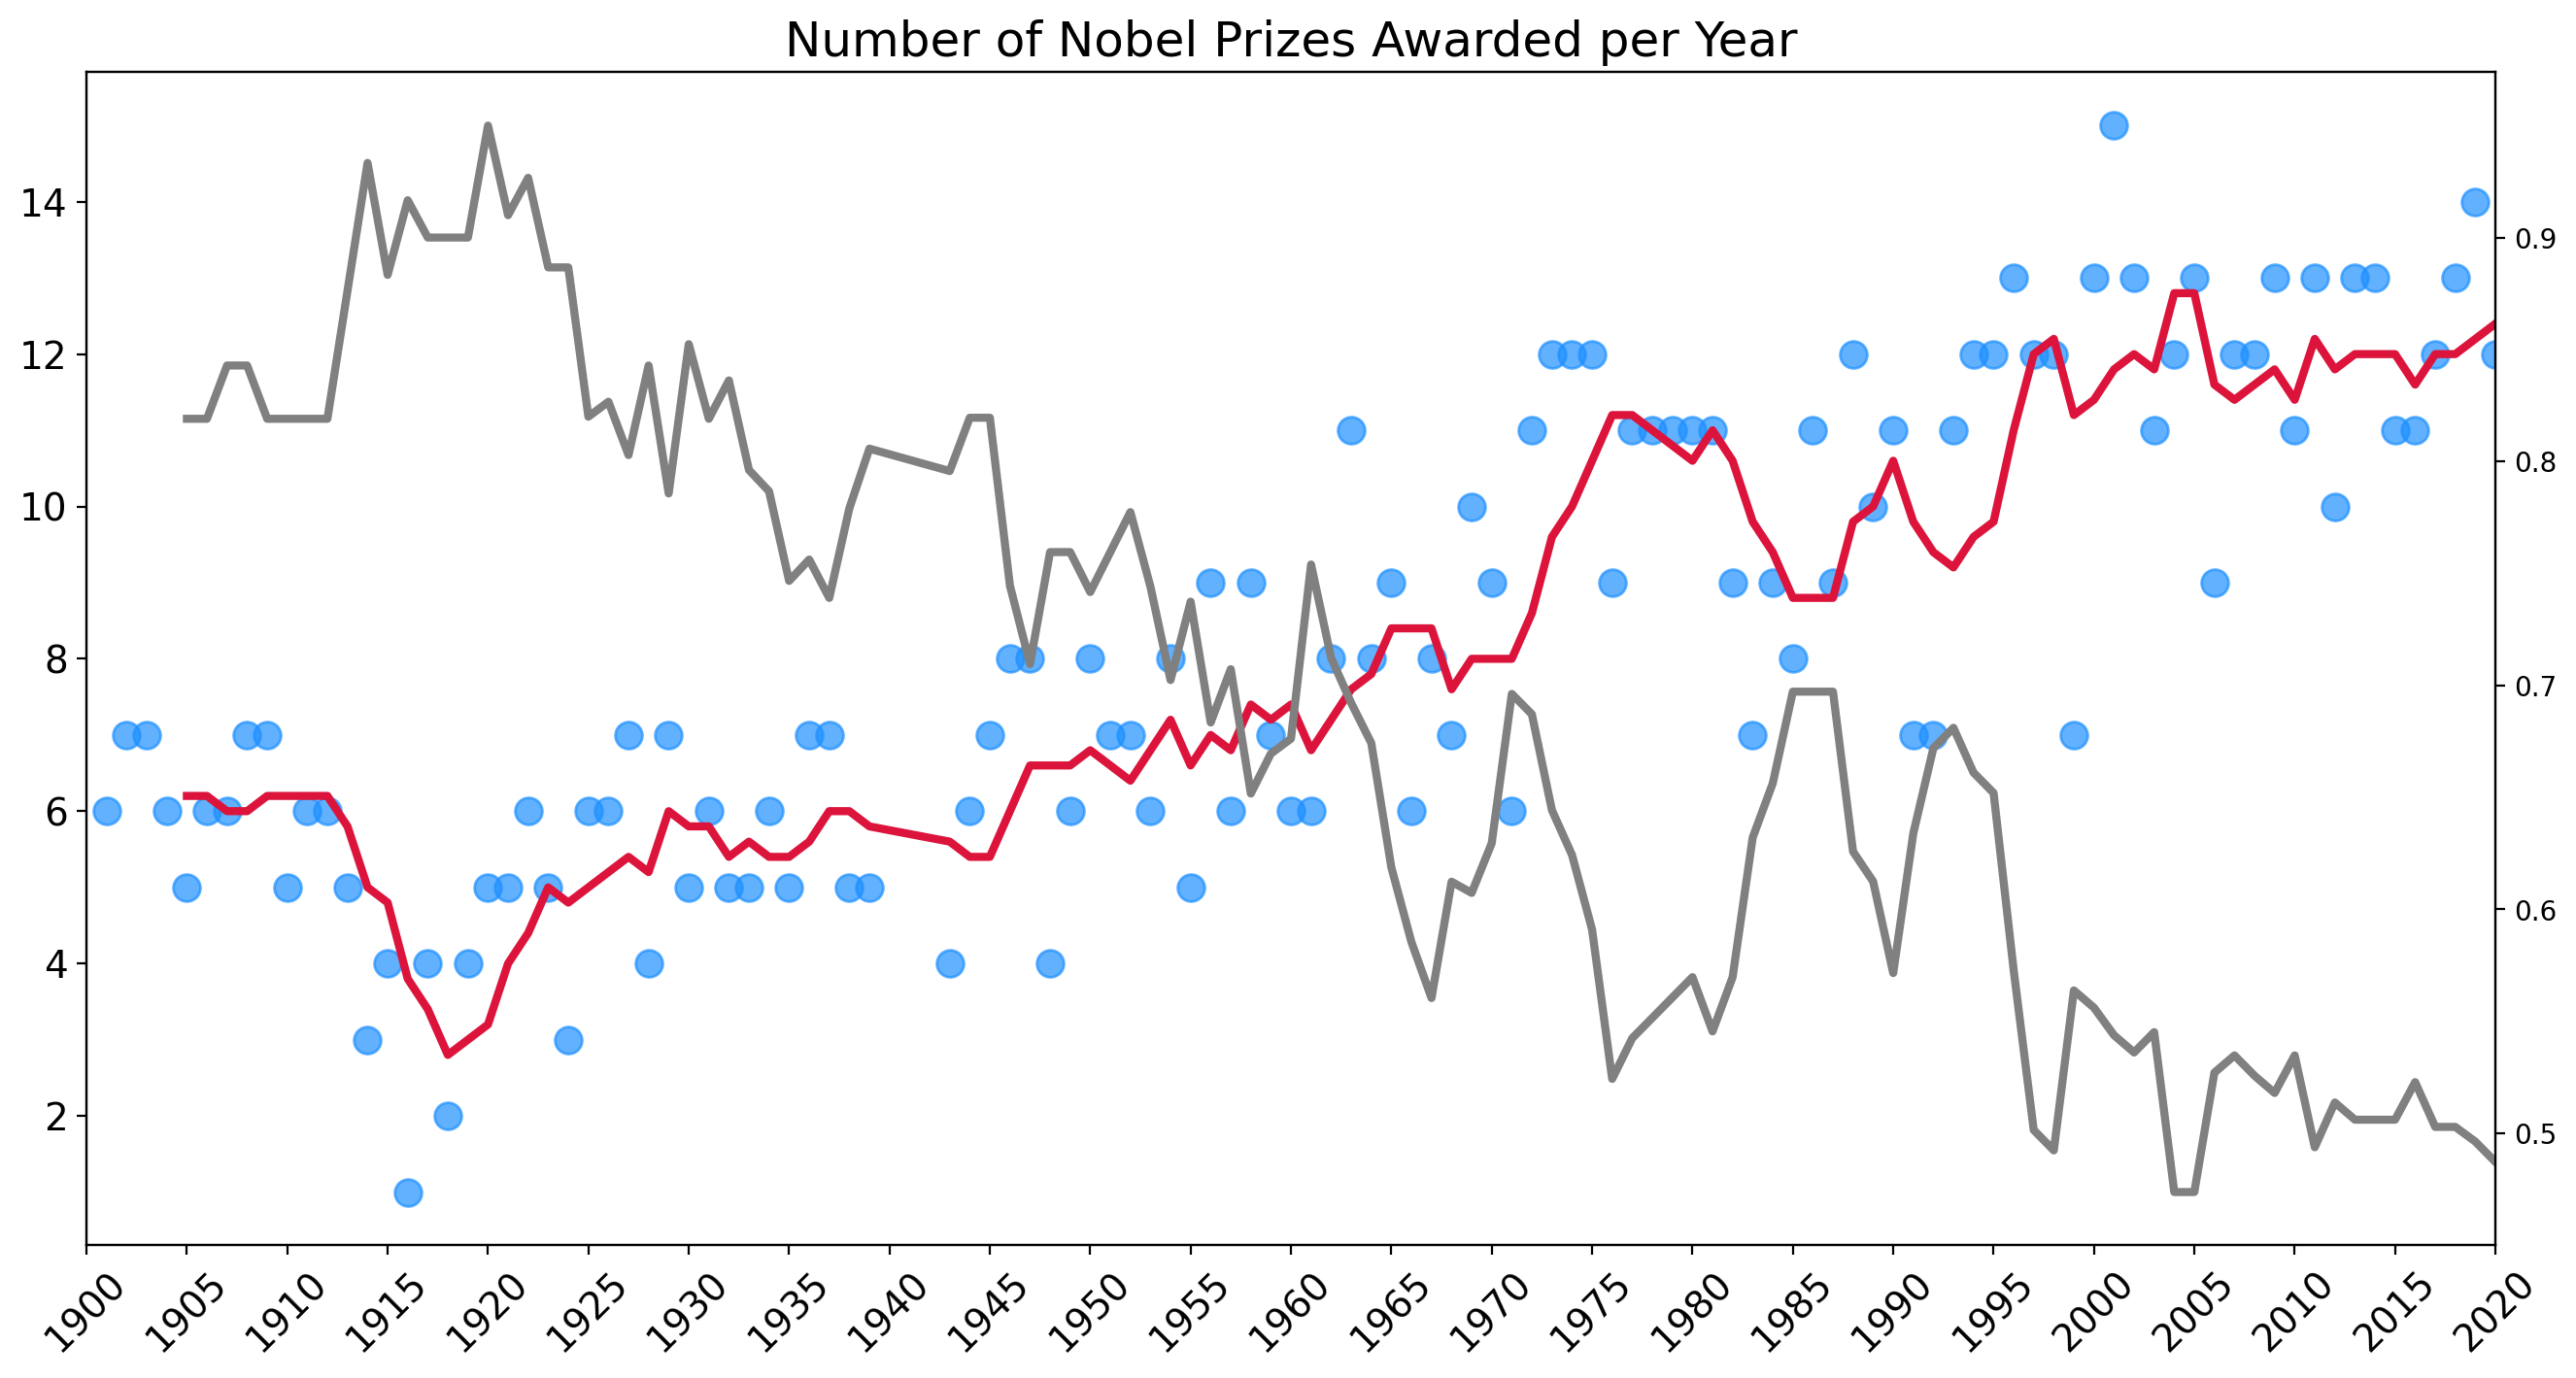

In [42]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021,5),fontsize=14,rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_xlim(1900,2020)

ax1.scatter(x=prize_per_year.index,y=prize_per_year.values,c='dodgerblue',alpha=0.7,
           s=100)

ax1.plot(prize_per_year.index,moving_average.values,c='crimson',linewidth=3)

ax2.plot(prize_per_year.index,share_moving_avg.values,c='grey',linewidth=3)
plt.show()

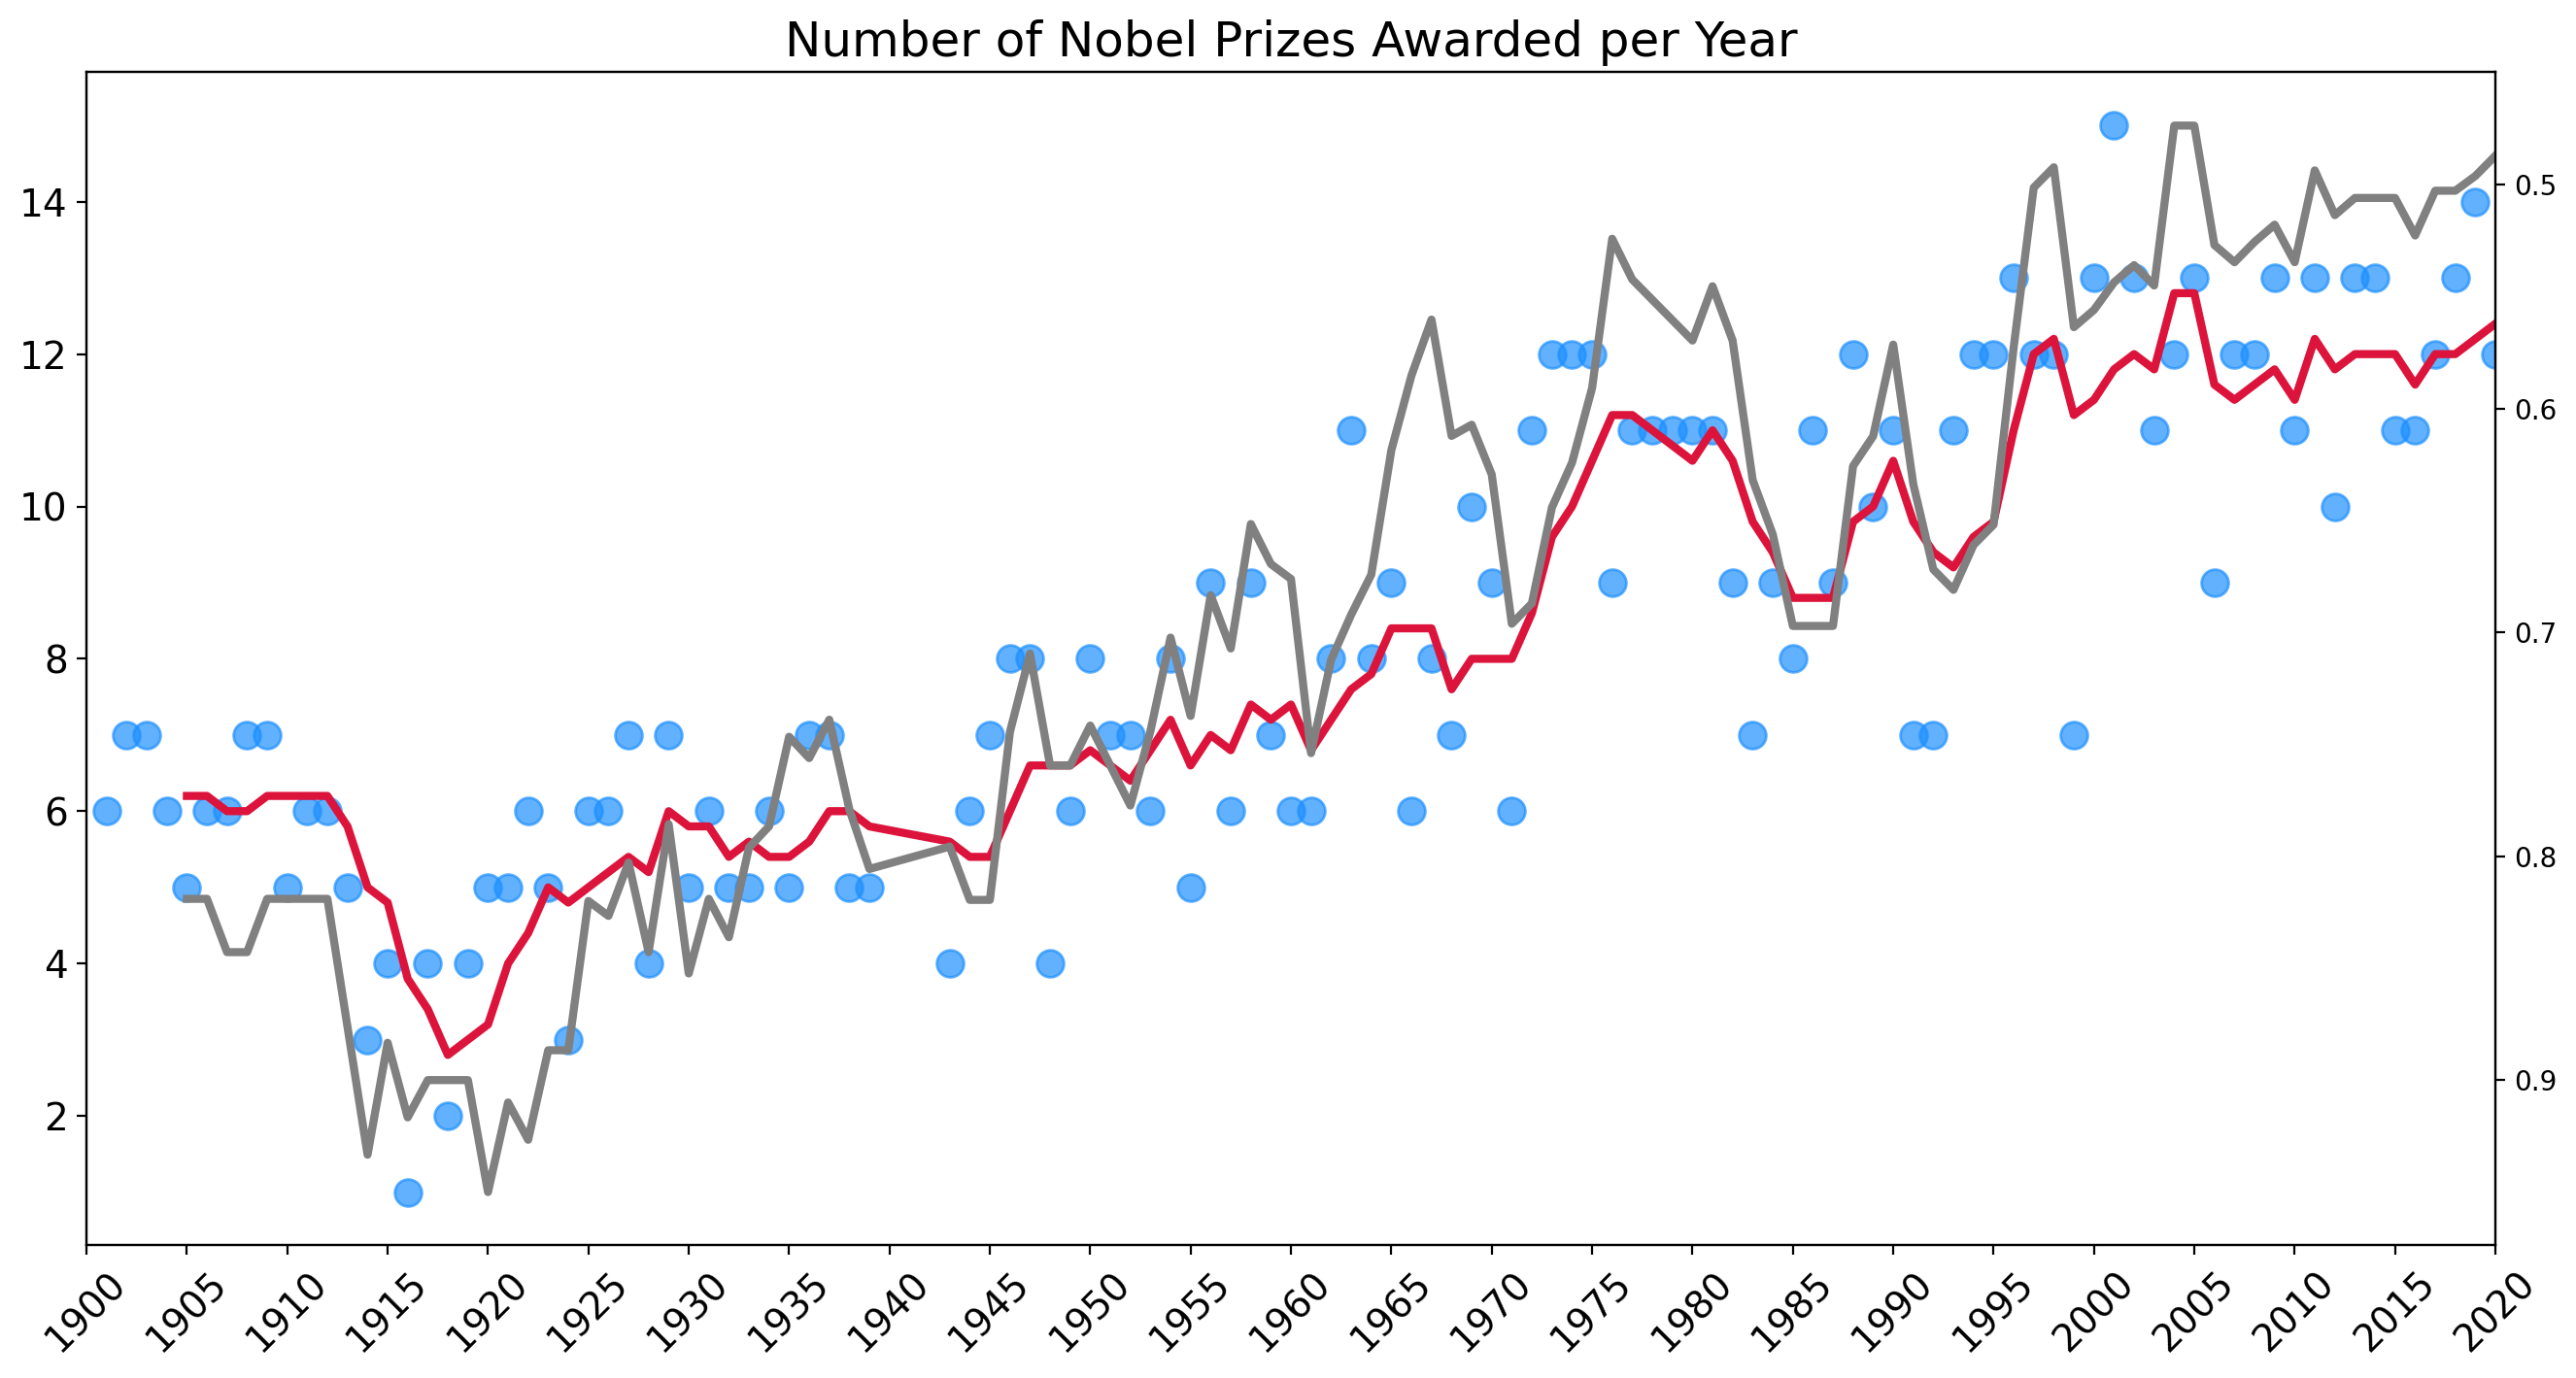

In [43]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021,5),fontsize=14,rotation=45)

ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_xlim(1900,2020)

ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,y=prize_per_year.values,c='dodgerblue',alpha=0.7,
           s=100)

ax1.plot(prize_per_year.index,moving_average.values,c='crimson',linewidth=3)

ax2.plot(prize_per_year.index,share_moving_avg.values,c='grey',linewidth=3)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top_countries = df_data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
